In [1]:
import xgboost

In [2]:
!pip install xgboost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install xgboost

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [6]:
train = pd.read_csv("train_s3TEQDk.csv")
test = pd.read_csv("test_mSzZ8RL.csv")

In [7]:
train.shape,test.shape

((245725, 11), (105312, 10))

In [8]:
train.isnull().sum()/train.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [9]:
test.isnull().sum()/test.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

In [10]:
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 4


In [11]:
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 3


In [12]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [13]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot('Credit_Product',data=train)

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 576x360 with 0 Axes>

In [21]:
print(train['Credit_Product'].value_counts())
print('******************************************')
print(test['Credit_Product'].value_counts())

0    144357
1     72043
2     29325
Name: Credit_Product, dtype: int64
******************************************
0    61608
1    31182
2    12522
Name: Credit_Product, dtype: int64


In [22]:
train['Credit_Product']= train['Credit_Product'].fillna(train['Credit_Product'].mode()[0])
test['Credit_Product']= test['Credit_Product'].fillna(test['Credit_Product'].mode()[0])

In [23]:
train['Credit_Product'].isnull().sum(),test['Credit_Product'].isnull().sum()

(0, 0)

In [24]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [25]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,179194,0,73,18,1,2,43,0,1045696,0,0
1,131013,0,30,27,2,0,32,0,581988,0,0
2,121520,0,56,18,3,2,26,0,1484315,1,0
3,57273,1,34,20,2,0,19,0,470454,0,0
4,209602,0,30,32,2,0,33,0,886787,0,0


In [26]:
train['Gender'].value_counts()

1    134197
0    111528
Name: Gender, dtype: int64

In [27]:
train['Gender']= train['Gender'].astype(str)

<AxesSubplot:xlabel='Gender', ylabel='count'>

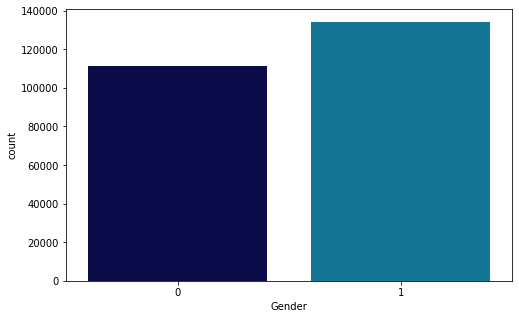

In [28]:
plt.figure(figsize=(8,5))
sns.countplot('Gender',data=train,palette='ocean')

<AxesSubplot:xlabel='Channel_Code', ylabel='count'>

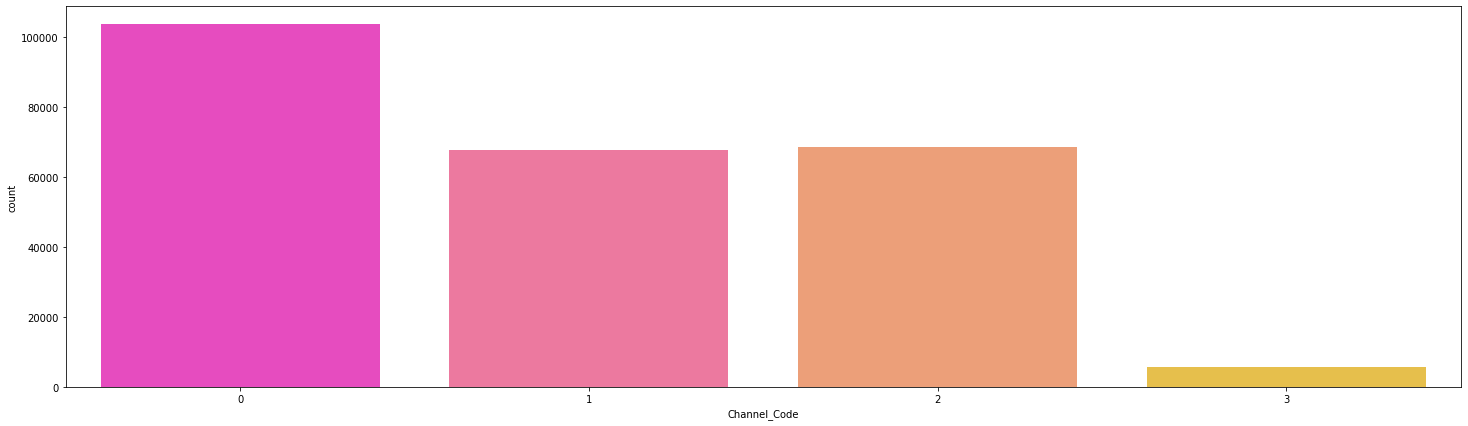

In [29]:
plt.figure(figsize=(25,7))
sns.countplot('Channel_Code',data=train,palette='spring')

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

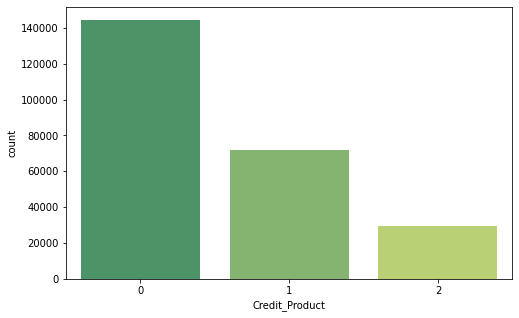

In [30]:
plt.figure(figsize=(8,5))
sns.countplot('Credit_Product',data=train,palette='summer')

<AxesSubplot:xlabel='Channel_Code', ylabel='count'>

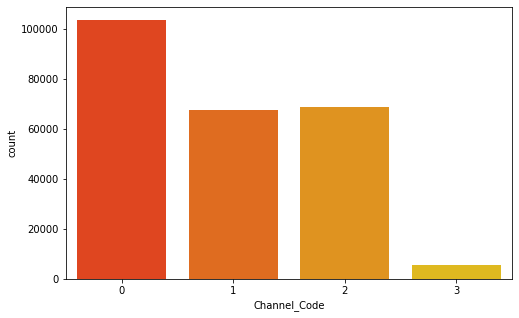

In [31]:
plt.figure(figsize=(8,5))
sns.countplot('Channel_Code',data=train,palette='autumn')

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

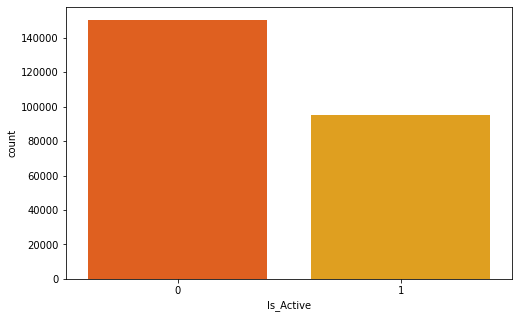

In [32]:
plt.figure(figsize=(8,5))
sns.countplot('Is_Active',data=train,palette='autumn')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

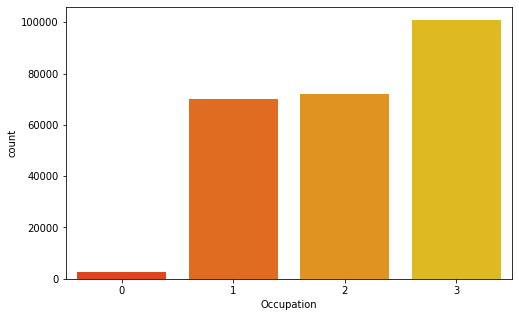

In [33]:
plt.figure(figsize=(8,5))
sns.countplot('Occupation',data=train,palette='autumn')

In [34]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,179194,0,73,18,1,2,43,0,1045696,0,0
1,131013,0,30,27,2,0,32,0,581988,0,0
2,121520,0,56,18,3,2,26,0,1484315,1,0
3,57273,1,34,20,2,0,19,0,470454,0,0
4,209602,0,30,32,2,0,33,0,886787,0,0


In [35]:
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [36]:
X= train.drop(columns = ['Is_Lead'], axis=1)
y= train['Is_Lead']

In [54]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [49]:
from sklearn.metrics import roc_auc_score

In [52]:
from xgboost import XGBClassifier

In [65]:
xgbc=XGBClassifier()
print(xgbc)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[17:14:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
score=xgbc.score(X_train,y_train)
print('training score',score)

training score 0.8691575948723166


In [66]:
y_pred=xgbc.predict(X_valid)
auc_score=roc_auc_score(y_valid,y_pred)

In [67]:
auc_score

0.7551441419757916

In [68]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(xgbc,X_train,y_train,cv=10)
print('cv mean score',cv_score.mean())

[17:21:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [69]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [78]:
params={'learning_rate':[0.001,0.01,0.1,0.25,0.4,0.5],
        'max_depth':[1,2,3,4,5,6],
        'max_features':[1,2,3,4,5,6],
        'n_estimator':[20,40,50,70,100]
}

random_search=RandomizedSearchCV(xgbc,param_distributions=params,n_iter=5,cv=5,n_jobs=-1,verbose=0)
random_search.fit(X_train,y_train)
print('train_score',random_search.score(X_train,y_train))
print('test_score',random_search.score(X_valid,y_valid))

[18:41:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features", "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:41:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train_score 0.8619391596296673
test_score 0.8593549699867739


In [79]:
print(random_search.best_params_)
print(random_search.best_estimator_)

{'n_estimator': 100, 'max_features': 8, 'max_depth': 3, 'learning_rate': 0.25}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=3, max_features=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimator=100, n_estimators=100, n_jobs=8, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [89]:
xgbc=XGBClassifier(n_estimator=100, max_features=5, max_depth=3, learning_rate=0.1)
xgbc.fit(X_train,y_train)
y_pred=xgbc.predict(X_valid)                   

[19:13:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features", "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:13:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [92]:
auc=roc_auc_score(y_valid,y_pred)
auc

0.7467071097153697

In [95]:
params={'learning_rate':[0.001,0.01,0.1,0.25,0.4,0.5],
        'max_depth':[1,2,3,4,5,6],
        'max_features':[1,2,3,4,5,6],
        'n_estimator':[20,40,50,70,100]
}

grid_search=GridSearchCV(xgbc,param_grid=params,cv=5,n_jobs=-1,verbose=0)
grid_search.fit(X_train,y_train)
print('train_score',grid_search.score(X_train,y_train))
print('test_score',grid_search.score(X_valid,y_valid))

KeyboardInterrupt: 

In [94]:
submission = pd.read_csv('sample_submission_eyYijxG.csv')
model = XGBClassifier(n_estimator=100, max_features=5, max_depth=3, learning_rate=0.1)
model.fit(X, y)
final_predictions = model.predict(test)
submission['Is_Lead'] = final_predictions
#only positive predictions for the target variable
#submission['Item_Outlet_Sales'] = submission['Item_Outlet_Sales'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission2.csv', index=False)

[19:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features", "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
